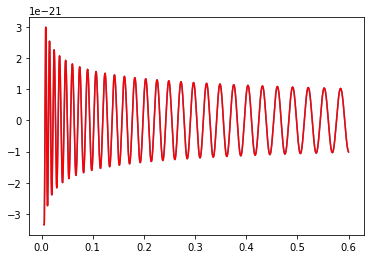

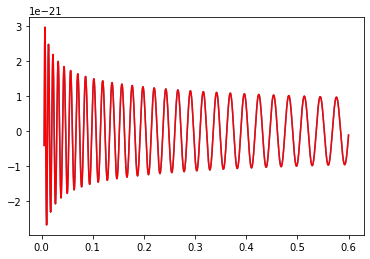

55.06505070339456


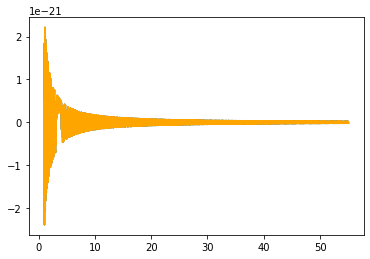

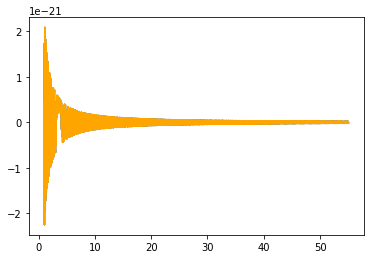

In [ ]:
#Import library 

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

#Define Constants

m_1 = 20*1.989e30 # Masa kg
m_2 = 20*1.989e30 # Masa Kg 
d_l = 100*3.086e22
G = 6.674e-11
M_c = ((m_1 * m_2)**(3/5))/(m_1 + m_2)**(1/5)
M = m_1+m_2
i = (np.pi)/4
c = 3e8 
phi_0 = 0
t_col = 0.65

#Define functions (time domain)

def phi(tau):
    p_t = p = -2*(5*G*M_c/c**3)**(-5/8)*tau**(5/8) + phi_0
    return p_t

def h_plus(tau):
    h_1 = (1/d_l)*(((G*M_c)/c**2)**(5/4))*((5/(c*tau))**(1/4))*((1+((np.cos(i))**2))/2)*np.cos(phi(tau))
    return h_1
    print(h_1)

def h_x(tau):
    h_2 = h_1 = (1/d_l)*(((G*M_c)/c**2)**(5/4))*((5/(c*tau))**(1/4))*np.cos(i) * (np.sin(phi(tau)))
    return h_2

t_0 = 0.005
t_f = 0.6

tau = np.linspace(t_0, t_f,5000)
h_plus_t = h_plus(tau) 

plt.plot(tau, h_plus_t)
plt.plot(tau, h_plus_t,"-r")
plt.show()

tau = np.linspace(t_0,t_f,5000)
h_plust_t2 = h_x(tau)

plt.plot(tau,h_plust_t2)
plt.plot(tau,h_plust_t2,"-r")
plt.show()


#Define functions (frecuency domain)

def Psi_plus(f):
    p_plus = 2*np.pi*f*(t_col + d_l/c) - (np.pi/4) + 3/4*(G*M_c*8*np.pi*f/c**3)**(-5/3)
    return p_plus 

def h_plus2(f):
    h_3 = (1/np.pi)*(5/(24)**(4/3))**(1/2) * np.cos(Psi_plus(f)) * (c/d_l)*((G*M_c/c**3)**(5/6))*f**(-7/6) * ((1+np.cos(i)**2)/2)
    return h_3

def Psi_x(f):
    p_x1 = (Psi_plus(f)) + (np.pi/2)
    return p_x1

def h_x2(f):
    h_4 = (1/np.pi)*(5/(24)**(4/3))**(1/2) * np.cos(Psi_x(f)) * (c/d_l)*((G*M_c/c**3)**(5/6))*f**(-7/6) * np.cos(i)
    return h_4


fisc_o = (c**3/(12*np.pi*np.sqrt(6)*G*M))
print(fisc_o)

f1= 1
ff = fisc_o

fisco_1 = np.linspace(f1, ff,5000)
h_plust3 = h_plus2(fisco_1)

plt.plot(fisco_1,h_plust3)
plt.plot(fisco_1,h_plust3,"orange")
plt.show()

fisco_2 = np.linspace(f1, ff,5000)
h_plust4 = h_x2(fisco_2)

plt.plot(fisco_2,h_plust4)
plt.plot(fisco_2,h_plust4,"orange")
plt.show()






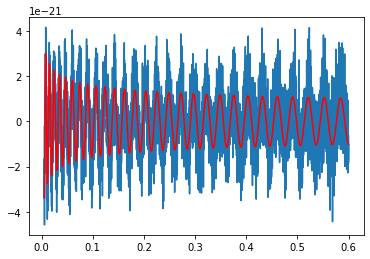

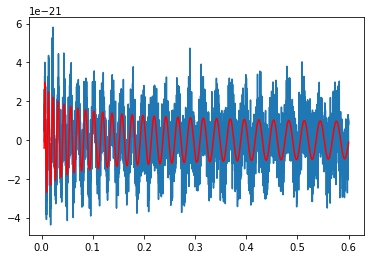

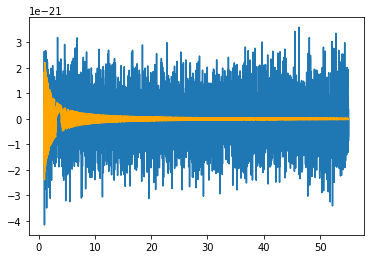

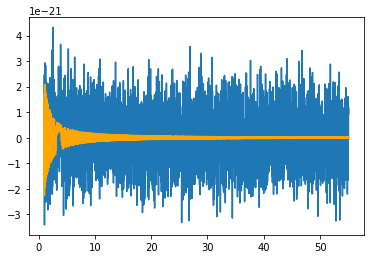

In [ ]:
# Noise constant

mu = 0
var = 10e-22
n_points_t1 = 5000
n_points_t2 = 5000
noise_t1 = np.random.normal(mu, var, n_points_t1)
noise_t2 = np.random.normal(mu, var, n_points_t2)
i = (np.pi)/4

#Add noise 

# Time domain 

tau_n1 = np.linspace(t_0, t_f,5000)
noise_1 = noise_t1

plt.plot(tau_n1, noise_1 + h_plus_t)
plt.plot(tau, h_plus_t,"-r")
plt.show()

tau_n2 = np.linspace(t_0,t_f,5000)
noise_2 = noise_t2

plt.plot(tau_n2, noise_2 + h_plust_t2 )
plt.plot(tau,h_plust_t2,"-r")
plt.show()

# Frecuency domain 

fisco_n1 = np.linspace(f1, ff,5000)
noise_3 = noise_t1

plt.plot(fisco_n1,noise_3 +h_plust3 )
plt.plot(fisco_1,h_plust3,"orange")
plt.show()

fisco_n2 = np.linspace(f1, ff,5000)
noise_4 = noise_t2

plt.plot(fisco_n2,noise_t2 + h_plust4)
plt.plot(fisco_2,h_plust4,"orange")
plt.show()



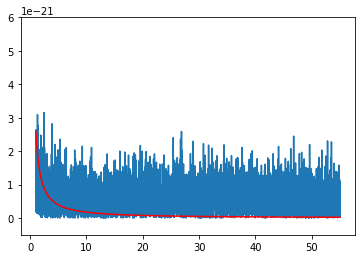

  0%|          | 0/4000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 4000/4000 [01:50<00:00, 36.30it/s]


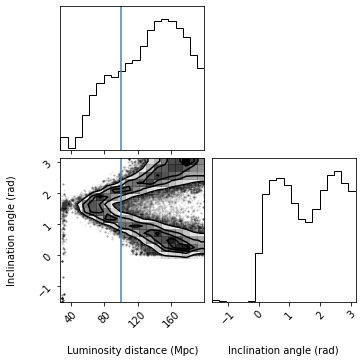

In [ ]:
# Sin coseno - Frecuencia 

def h_plus_square(f):
    h_sq = (1/np.pi)*((5/((24)**(4/3)))**(1/2)) * (c/d_l)*((G*M_c/(c**3))**(5/6))*(f**(-7/6)) * ((1+np.cos(i)**2)/2)
    return h_sq

def h_x_square(f):
    h_sq2 = (1/np.pi)*((5/((24)**(4/3)))**(1/2)) * (c/d_l)*((G*M_c/(c**3))**(5/6))*(f**(-7/6)) * np.cos(i)
    return h_sq2

fs = np.linspace(f1,ff, 5000)

h_plus_noise = np.zeros(fs.size)
for i in range(fs.size):
    h_plus_noise[i] = h_plus_square(fs[i]) + noise_t1[i]

h_x_noise = np.zeros(fs.size)
for i in range(fs.size):
    h_plus_noise[i] = h_x_square(fs[i]) + noise_t2[i]

h_data = np.sqrt((h_plus_noise**2 + h_x_noise**2)/2)
h_no_noise = np.sqrt((h_plus_square(fs)**2 + h_x_square(fs)**2)/2)

#h_c1 = h_com(fs)

plt.plot(fs, h_data)
plt.plot(fs, h_no_noise, "-r")
plt.ylim(-0.5e-21,6e-21)
plt.show()

#Day 4
import emcee
import corner
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad


#Define 
#h_data1 = noise_t2 + h_plust4
Mpc = 3.09e22

#define prior, likelihood, probability
def log_prior(theta):
    D_l, Iota = theta
    if 1 < D_l < 200 and 0 < Iota < np.pi:
        return 0.0
    return -np.inf


#define model as the combination of h_plus and h_cross mod-squared (no cosine part)
def get_mod(theta):
    D_l, Iota = theta
    h_plus_mod = ((5/((24*np.pi)**(4/3)))**(1/2)) * (c/(D_l*Mpc))*((G*M_c/c**3)**(5/6))*(1/(fs**(7/6))) * ((1+((np.cos(Iota))**2))/2)
    h_cross_mod = ((5/((24*np.pi)**(4/3)))**(1/2)) * (c/(D_l*Mpc))*((G*M_c/c**3)**(5/6))*(1/(fs**(7/6))) * np.cos(Iota)
    h_c = np.sqrt((1/2)*(h_plus_mod**2 + h_cross_mod**2))
    #print (h_c)
    return h_c



#define elements of Bayes Theorem
def log_likelihood(theta, h_data):
    model = get_mod(theta)
    #print(model)
    integrand = -2*((h_data-model)/var)**2
    result = sp.integrate.simpson(y=integrand,x=fs)
    #print(result)
    return result#integrate here the likelihood
    #implement emcee

def log_probability(theta):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, h_data)


#implement emcee
pos = (30, 0.5)+np.random.randn(30, 2)
nwalkers, ndim = pos.shape
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability)
sampler.run_mcmc(pos, 4000, progress=True)

samples = sampler.chain[:,:,:].reshape((-1,ndim))
filename = "output_case_1.dat"
np.savetxt(filename, samples)

data = np.loadtxt('output_case_1.dat')

fig = corner.corner(data, labels=["Luminosity distance (Mpc)", "Inclination angle (rad)"], truths=[d_l/Mpc, i])
plt.show()







In [ ]:
#print(h_data)
# We will need emcee 
!pip install emcee
!pip install corner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
